In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")

In [148]:
aggregate=pd.read_csv('./aggregate.csv',engine='python')
aggregate.set_index('GEO_ID',inplace=True)

In [149]:
results=['democrat','republican']

In [150]:
agg_train, agg_test = train_test_split(aggregate,test_size=0.2,shuffle=True,random_state=121)

In [151]:
agg_corr=agg_train.iloc[:,2:].corr()
agg_corr.loc['democrat',np.abs(agg_corr['democrat'])>0.4]

afr_amer_pc    0.452121
asian_pc       0.423759
white_pc      -0.556840
urban          0.511503
rural         -0.511503
hs_deg        -0.440351
bac_deg        0.514666
democrat       1.000000
republican    -0.998694
Name: democrat, dtype: float64

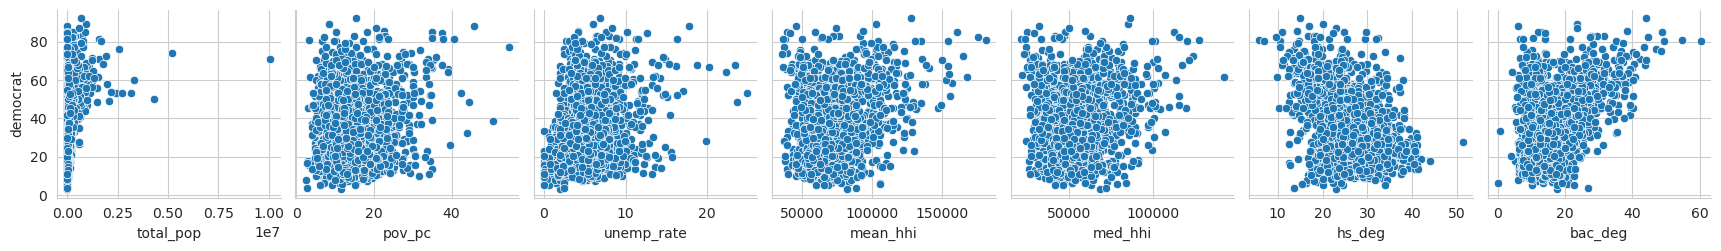

In [153]:
sns.pairplot(data=agg_train,x_vars=['total_pop','pov_pc', 'unemp_rate', 'mean_hhi','med_hhi', 'hs_deg', 'bac_deg'],y_vars=['democrat'])
plt.show()

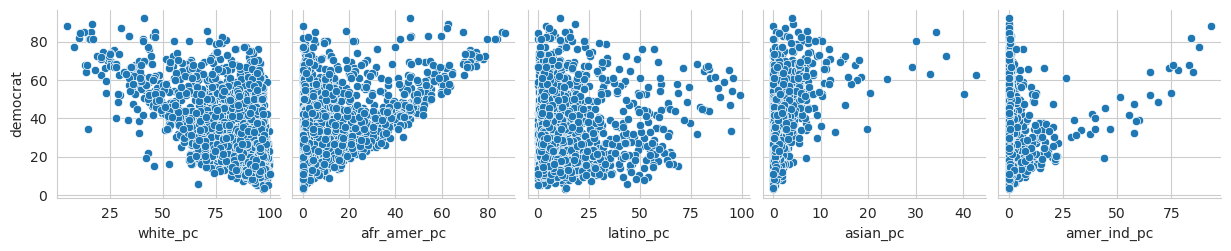

In [154]:
sns.pairplot(data=agg_train,x_vars=['white_pc','afr_amer_pc','latino_pc','asian_pc','amer_ind_pc'],y_vars=['democrat'])
plt.show()

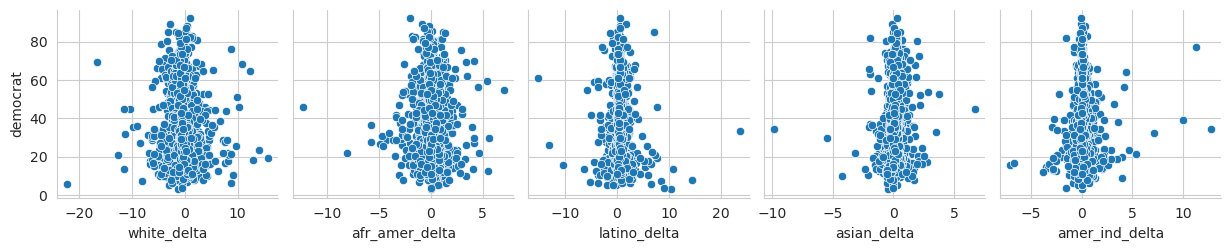

In [155]:
sns.pairplot(data=agg_train,x_vars=['white_delta','afr_amer_delta','latino_delta','asian_delta','amer_ind_delta'],y_vars=['democrat'])
plt.show()

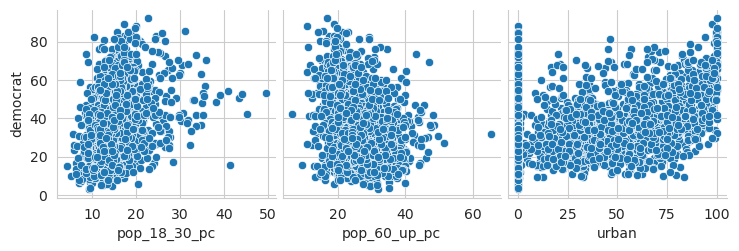

In [156]:
sns.pairplot(data=agg_train,x_vars=['pop_18_30_pc','pop_60_up_pc','urban'],y_vars=['democrat'])
plt.show()

    Variables to consider:
        pov_pc
        unemp_rate
        hs_deg
        bac_deg
        white_pc (there is high correlation with the other ethnic percentages)
        pop_18_30_pc
        urban

In [158]:
agg_train['unemp_bac']=agg_train['unemp_rate']*agg_train['bac_deg']
agg_train['bac2']=agg_train['bac_deg']**2
agg_train['unemp_rate2']=agg_train['unemp_rate']**2
agg_train['log_pop']=np.log10(agg_train['total_pop'])
agg_train['young_unemp']=np.log10(agg_train['pop_18_30_pc']*agg_train['unemp_rate'])
agg_train['log_pov']=np.log10(x_train['pov_pc'])
agg_train['pov_bac']=agg_train['pov_pc']*agg_train['bac_deg']
agg_train['urban3']=agg_train['urban']**2

/home/srijan/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


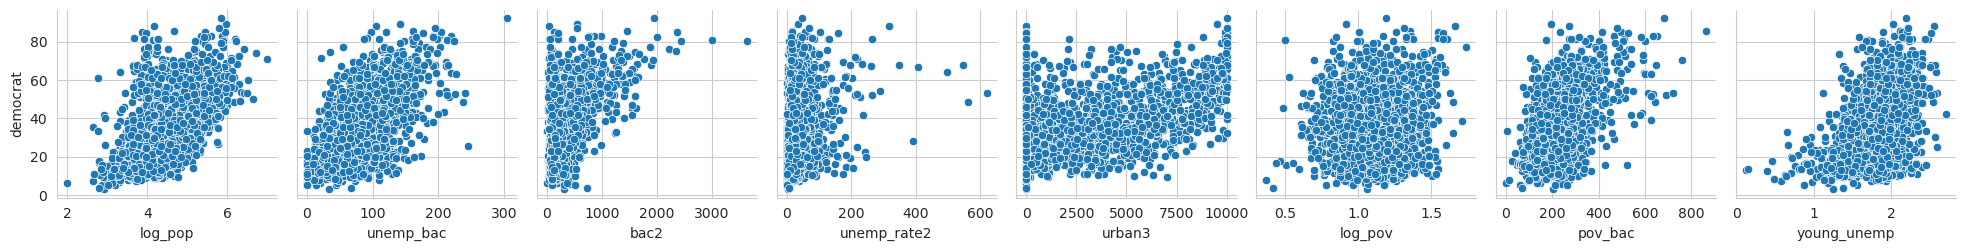

In [159]:
sns.pairplot(data=agg_train,x_vars=['log_pop', 'unemp_bac', 'bac2', 'unemp_rate2', 'urban3', 'log_pov', 'pov_bac', 'young_unemp'],y_vars=['democrat'])
plt.show()

    Possible correlations:
        Strong:
            white_pc
            log_pop
            urban
            unemp_bac = unemp_rate * bac_deg
        Weak:
            pov_bac
            pov_pc
            bac_deg
            unemp_rate

In [160]:
agg_corr=agg_train.iloc[:,2:].corr()
agg_corr.loc['democrat',np.abs(agg_corr['democrat'])>0.4]

afr_amer_pc    0.452121
asian_pc       0.423759
white_pc      -0.556840
urban          0.511503
rural         -0.511503
hs_deg        -0.440351
bac_deg        0.514666
democrat       1.000000
republican    -0.998694
unemp_bac      0.620711
bac2           0.526890
log_pop        0.536275
pov_bac        0.544839
urban3         0.547484
Name: democrat, dtype: float64